In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
train = pd.read_csv ('../input/google-stock-price/Google_Stock_Price_Train.csv')
test = pd.read_csv('../input/google-stock-price/Google_Stock_Price_Test.csv')

In [123]:
train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [124]:
df = train[['Open','Close','Volume','High','Low']]



In [125]:
#Conerting Volume to int
Volume = np.array(train['Volume'])
temp_v=[]
for i in Volume:
    
    temp_v.append(int(''.join(i.split(','))))


In [126]:
Close = train['Close']
Close = np.array(Close)
temp_clo=[]
for i in Close:
    
    temp_clo.append(float(''.join(i.split(','))))



In [127]:
#Reshaping Array

temp_clo= np.array(temp_clo)
temp_clo = temp_clo.reshape(-1,1)

temp_v= np.array(temp_v)
temp= temp_v.reshape(-1,1)
temp_v = temp_v.reshape(-1,1)

In [128]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Open = scaler.fit_transform(train[['Open']])
High = scaler.fit_transform(train[['High']])
Low = scaler.fit_transform(train[['Low']])


Close = scaler.fit_transform(temp_clo)
#Volume = scaler.fit_transform(temp_v)


In [129]:
High.shape

(1258, 1)

In [130]:
Close.shape

(1258, 1)

In [131]:
x1=[]
x2=[]
x3=[]
x4=[]
#x5=[]

for i in range(1198):
    
    x1.append(Open[i:i+61,0])
    
    x2.append(High[i:i+61,0])
    x3.append(Low[i:i+61,0])
    x4.append(Close[i:i+61,0])
    #x5.append(Volume[i:i+61,0])
    
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
#x5 = np.array(x5)

In [132]:
x1.shape,x2.shape,x3.shape,x4.shape#,x5.shape



((1198, 61), (1198, 61), (1198, 61), (1198, 61))

In [133]:
y = x1[:,-1]
x1=x1[:,:60]
x2=x2[:,:60]
x3=x3[:,:60]
x4=x4[:,:60]
#x5=x5[:,:60]

In [134]:
x1.shape,x2.shape,x3.shape,x4.shape
X = np.hstack((x1,x2,x3,x4))
X_train = X.reshape(1198,60,4)


In [135]:

X_train.shape




(1198, 60, 4)

In [136]:
scaler.fit(train[['Open']])
scaler.inverse_transform([y])

array([[325.5 , 324.66, 319.19, ..., 793.7 , 783.33, 782.75]])

In [137]:
from tensorflow.keras.layers import LSTM ,Dense,Dropout
from tensorflow.keras.models import Sequential

In [138]:
model = Sequential()
model.add(LSTM(150, return_sequences=True , input_shape = (60,4)))
model.add(Dropout(rate = 0.2))
model.add(LSTM(200,return_sequences=True))

model.add(LSTM(200,return_sequences=True))
model.add(LSTM(200,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [139]:
model.compile(loss='mean_squared_error')

In [140]:
model.fit(X_train,y,batch_size=32,epochs=50)

Epoch 1/50
38/38 [==============================] - 23s 415ms/step - loss: 0.2417
Epoch 2/50
38/38 [==============================] - 15s 403ms/step - loss: 0.0356
Epoch 3/50
38/38 [==============================] - 16s 413ms/step - loss: 0.0298
Epoch 4/50
38/38 [==============================] - 15s 399ms/step - loss: 0.0161
Epoch 5/50
38/38 [==============================] - 15s 406ms/step - loss: 0.0182
Epoch 6/50
38/38 [==============================] - 15s 399ms/step - loss: 0.0157
Epoch 7/50
38/38 [==============================] - 16s 408ms/step - loss: 0.0113
Epoch 8/50
38/38 [==============================] - 15s 400ms/step - loss: 0.0074
Epoch 9/50
38/38 [==============================] - 15s 407ms/step - loss: 0.0084
Epoch 10/50
38/38 [==============================] - 16s 414ms/step - loss: 0.0071
Epoch 11/50
38/38 [==============================] - 15s 407ms/step - loss: 0.0070
Epoch 12/50
38/38 [==============================] - 15s 403ms/step - loss: 0.0064
Epoch 13/50
3

In [142]:
pred = model.predict(X_train)

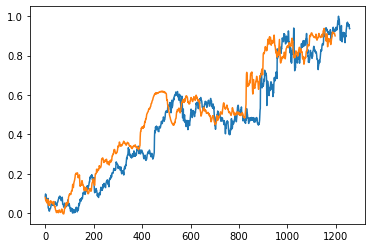

In [143]:
plt.plot(Open)
plt.plot(pred)

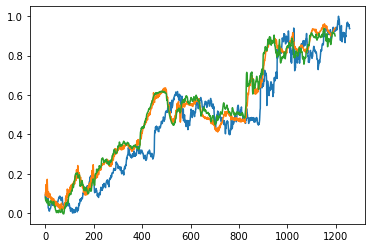

In [144]:
plt.plot(Open)
plt.plot(pred2)
plt.plot(pred)

**Testing Model on Test data**

In [141]:

x_test = pd.concat([train[['Open','High','Low','Close']][-60:],test[['Open','High','Low','Close']]],axis=0)


In [ ]:
#Conerting Volume to int
Volume = np.array(x_test['Volume'])
temp_v=[]
for i in Volume:
    
    temp_v.append(int(''.join(i.split(','))))
temp_v=np.array(temp_v)

In [98]:
temp_v2 = temp_v.reshape(80,1)
 

In [145]:
scaler.fit(train[['Open']])
Open = scaler.transform(x_test[['Open']])

scaler.fit(train[['High']])
High = scaler.transform(x_test[['High']])

scaler.fit(train[['Low']])
Low = scaler.transform(x_test[['Low']])

scaler.fit(temp_clo)
Close = scaler.transform(x_test[['Close']])

#scaler.fit(temp)
#Volume = scaler.transform(temp_v2)


In [146]:
x1=[]
x2=[]
x3=[]
x4=[]
#x5=[]

for i in range(20):
    
    x1.append(Open[i:i+60,0])
    
    x2.append(High[i:i+60,0])
    x3.append(Low[i:i+60,0])
    x4.append(Close[i:i+60,0])
    #x5.append(Volume[i:i+60,0])
    
x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
#x5 = np.array(x5)

In [147]:

x_test2 = np.hstack((x1,x2,x3,x4))
x_test2 = x_test2.reshape(20,60,4)
x_test2.shape


(20, 60, 4)

In [148]:
scaler.fit(train[['Open']])

MinMaxScaler()

In [149]:
y_pre = scaler.inverse_transform(model.predict(x_test2))

In [150]:
y_pre

array([[757.6475 ],
       [762.2947 ],
       [764.4779 ],
       [770.8325 ],
       [778.8884 ],
       [782.2148 ],
       [780.0696 ],
       [780.83624],
       [779.65735],
       [780.0933 ],
       [778.0193 ],
       [779.22577],
       [778.3721 ],
       [778.8403 ],
       [785.72253],
       [792.29736],
       [800.26666],
       [800.03345],
       [793.5904 ],
       [779.33765]], dtype=float32)

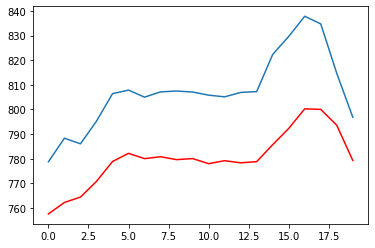

In [151]:
plt.plot(y_pre,c='Red')
plt.plot(test['Open'])


In [106]:
model.save('Stock_price.h5')